In [45]:
%pwd

'C:\\Users\\nikhi\\Machine_Learning_Practice\\Code\\machine_learning\\classification\\iris_data_classification'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = r'C:/Users/nikhi/OneDrive/Desktop/Machine_Learning_Practice/dataset/IRIS.csv'

# absolute path
#'C:\Users\nikhi\Machine_Learning_Practice\dataset'

In [3]:
# Load csv into dataframe
iris_df = pd.read_csv(dataset)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Understanding the dataset

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [5]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## data processing and vizualization

In [7]:
# checking if any thing missing or not available
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# check if row/line has duplicate
iris_df.duplicated().sum()

3

In [9]:
iris_df = iris_df.drop_duplicates()
print(iris_df.duplicated().sum())

0


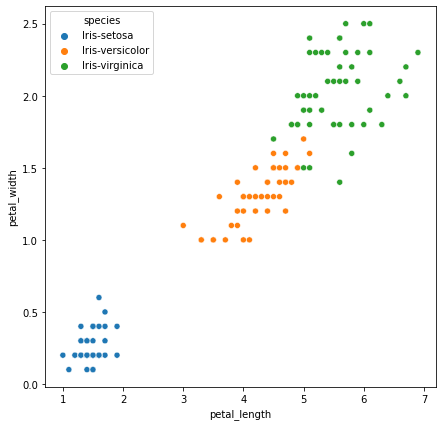

In [10]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="petal_length", y="petal_width", data=iris_df, hue="species")
plt.show()

## Evaluation Comparing Dataframe

In [11]:
eval_summary_df = pd.DataFrame(columns=['method', 'accuracy', 'f1'])
method_list = []
accuracy_list = []
f1_list = []

## Training and Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
inp=iris_df.drop(['species'], axis=1)
out=iris_df['species']

In [14]:
inp_train, inp_test, out_train, out_test = train_test_split(inp, out, test_size = .30, random_state = 26)

## Classification using Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [16]:
model.fit(inp_train, out_train)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
model.coef_

array([[-0.39655647,  0.91191734, -2.27122145, -0.98459135],
       [ 0.31197468, -0.23009355, -0.04751073, -0.89050896],
       [ 0.08458179, -0.68182379,  2.31873218,  1.87510031]])

In [18]:
model.intercept_

array([  8.76619192,   2.39590574, -11.16209766])

In [19]:
predictions = model.predict(inp_test)
predictions

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [20]:
from sklearn.metrics import accuracy_score, f1_score

In [21]:
print('Accuracy: ', round(accuracy_score(out_test, predictions), 2)*100, '%')
print('F1: ', round(f1_score(out_test, predictions, average='weighted'), 2)*100, '%')

Accuracy:  96.0 %
F1:  96.0 %


In [22]:
method_list.append('Logistic Regression')
accuracy_list.append(round(accuracy_score(out_test, predictions), 2))
f1_list.append(round(f1_score(out_test, predictions, average='weighted'), 2))

## Classification using Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [24]:
model.fit(inp_train, out_train)

DecisionTreeClassifier()

In [25]:
predictions = model.predict(inp_test)
predictions

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
print('Accuracy: ', round(accuracy_score(out_test, predictions), 2)*100, '%')
print('F1: ', round(f1_score(out_test, predictions, average='weighted'), 2)*100, '%')

Accuracy:  93.0 %
F1:  93.0 %


In [27]:
method_list.append('Decision Tree')
accuracy_list.append(round(accuracy_score(out_test, predictions), 2))
f1_list.append(round(f1_score(out_test, predictions, average='weighted'), 2))

## Classification using KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [29]:
model.fit(inp_train, out_train)

KNeighborsClassifier()

In [30]:
predictions = model.predict(inp_test)
predictions

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [31]:
print('Accuracy: ', round(accuracy_score(out_test, predictions), 2)*100, '%')
print('F1: ', round(f1_score(out_test, predictions, average='weighted'), 2)*100, '%')

Accuracy:  96.0 %
F1:  96.0 %


In [32]:
method_list.append('KNN')
accuracy_list.append(round(accuracy_score(out_test, predictions), 2))
f1_list.append(round(f1_score(out_test, predictions, average='weighted'), 2))

## Classification using Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [34]:
model.fit(inp_train, out_train)

RandomForestClassifier()

In [35]:
predictions = model.predict(inp_test)
predictions

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [36]:
print('Accuracy: ', round(accuracy_score(out_test, predictions), 2)*100, '%')
print('F1: ', round(f1_score(out_test, predictions, average='weighted'), 2)*100, '%')

Accuracy:  91.0 %
F1:  91.0 %


In [37]:
method_list.append('Random Forest')
accuracy_list.append(round(accuracy_score(out_test, predictions), 2))
f1_list.append(round(f1_score(out_test, predictions, average='weighted'), 2))

## Classification using Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()

In [39]:
model.fit(inp_train, out_train)

GaussianNB()

In [40]:
predictions = model.predict(inp_test)
predictions

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [41]:
print('Accuracy: ', round(accuracy_score(out_test, predictions), 2)*100, '%')
print('F1: ', round(f1_score(out_test, predictions, average='weighted'), 2)*100, '%')

Accuracy:  93.0 %
F1:  93.0 %


In [42]:
method_list.append('Naive Bayes')
accuracy_list.append(round(accuracy_score(out_test, predictions), 2))
f1_list.append(round(f1_score(out_test, predictions, average='weighted'), 2))

## Summary

In [43]:
eval_summary_df.method = method_list
eval_summary_df.accuracy = accuracy_list
eval_summary_df.f1 = f1_list

In [44]:
eval_summary_df

,method,accuracy,f1
0,Logistic Regression,0.96,0.96
1,Decision Tree,0.93,0.93
2,KNN,0.96,0.96
3,Random Forest,0.91,0.91
4,Naive Bayes,0.93,0.93
